# SVD  
ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

[[5.91274714 2.30203322]
 [5.57248242 1.97182599]
 [5.44697714 2.09520636]
 [5.43645948 1.87038151]
 [5.87564494 2.32829018]]


Text(0.5, 1.0, 'Truncated SVD, 2 Components')

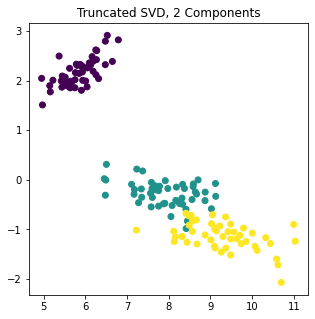

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
import matplotlib.pyplot as plt

iris = load_iris()
iris_data = iris.data

svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)
print(iris_transformed[:5])


f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)
ax.scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=iris.target)
ax.set_title("Truncated SVD, 2 Components")

# PCA  
ref: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

coefficient of each compoments:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


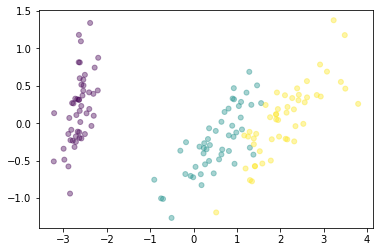

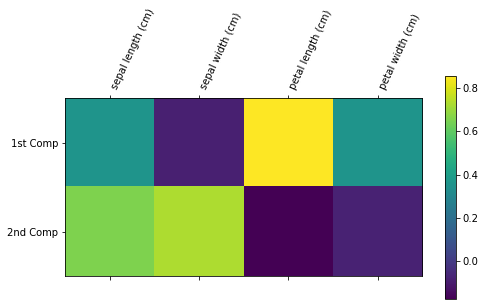

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data 
y = iris.target

x_data = np.array(x) 
y_data = np.array(y) 

pca = PCA(n_components=2) 
pca.fit(x_data) 
result = pca.transform(x_data) 

#print('result is:\n{}'.format(result))

print('coefficient of each compoments:\n{}'.format(pca.components_))


plt.scatter(result[:,0], result[:,1], c=y_data, s=25, alpha=0.4, marker='o')


plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),iris.feature_names,rotation=65,ha='left')
plt.show()

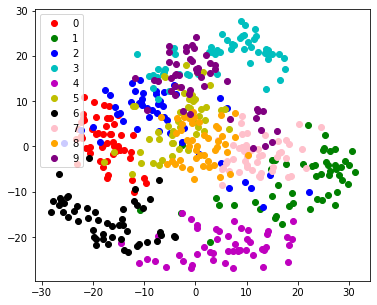

In [7]:
from sklearn import datasets
from sklearn.decomposition import PCA

digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]


X_2d = PCA(n_components=2).fit_transform(X)

target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

cancer = load_breast_cancer()

X = cancer.data 
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler()
pca = PCA(n_components=2)
model = SVC(kernel='rbf')


pipe = Pipeline([
    ('scaler',scaler),
    ('pca',pca),
    ('model',model)
])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.9649122807017544


# T-sne

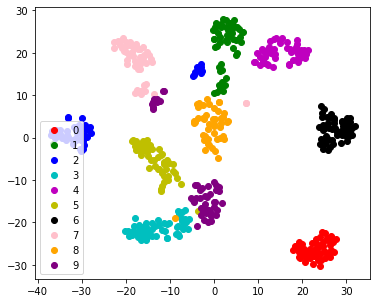

In [8]:
from sklearn import datasets
from sklearn.manifold import TSNE

digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X)

target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

# Grid Search  
ref:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X = cancer.data 
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5)

grid_kn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 25],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [12]:
# extract best estimator
print(grid_kn.best_estimator_)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=25, p=2, weights='distance')
# to test the bestfit
print(grid_kn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.9122807017543859


In [10]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load the digit data
digits = datasets.load_digits()
data1_features = digits.data[:1000]
data1_target = digits.target[:1000]

# Create dataset 2
data2_features = digits.data[1000:]
data2_target = digits.target[1000:]

parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(data1_features, data1_target)   

# View the accuracy score
print('Best score for data1:', clf.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

# Apply the classifier trained using data1 to data2, and view the accuracy score
clf.score(data2_features, data2_target)  

Best score for data1: 0.966
Best C: 10
Best Kernel: rbf
Best Gamma: 0.001


0.9698870765370138

In [11]:
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(data1_features, data1_target).score(data2_features, data2_target)

0.9698870765370138

In [3]:
text = '123'
text

'123'